In [114]:
import numpy as np
import matplotlib.pyplot as plt

class PrisonersGame():
    '''
        Prisoners dilema game. Player A and B both get the option to keep silence or snitch.
        If both players stay silent they each get T_silence years in prison.
        If both players snitch they get T_snitch years in prison. (Y > X)
        If one stays silent and the other snitches, whoever was silent gets T_backstab years and whoever snitched gets 0 years.
    ''' 
    def __init__(self, T_silence, T_snitches, T_backstab):
        
        # initial strats are uniform
        self.stratA = np.array([0.5, 0.5])
        self.stratB = np.array([0.5, 0.5])

        self.regretsA = np.zeros(2)
        self.regretsB = np.zeros(2)

        self.T_silence  = T_silence
        self.T_snitches = T_snitches
        self.T_backstab = T_backstab
        

    def cfr_step(self): 
        ''' simultaneous updating '''
        self.regretsA += self.calculate_regrets(self.stratA, self.stratB)
        self.regretsB += self.calculate_regrets(self.stratB, self.stratA)
        
        self.stratA = self.calculate_strats(self.regretsA)
        self.stratB = self.calculate_strats(self.regretsB)

    def calculate_strats(self, regrets):
        ''' strat[0] is to rat; strat[1] is to keep silent '''
        regrets_plus = regrets * (regrets > 0)

        if regrets_plus.sum() <= 0:
            return np.array([0.5, 0.5])

        strats = regrets_plus / regrets_plus.sum()
        return strats

    def calculate_regrets(self, hero_strats, villain_strats):
        hero_EV = 0
        hero_payoffs = np.zeros(2) 

        for a in range(2):
            hero_payoffs[a] = self.calc_EV(a, villain_strats)
            hero_EV += hero_payoffs[a] * hero_strats[a]

        regret_change = hero_payoffs - hero_EV
        return regret_change

    def calc_EV(self, action, villain_strat):
        EV = 0

        if action == 0:
            EV = -villain_strat[0] * self.T_snitches

        elif action == 1:
            EV = -villain_strat[0] * self.T_backstab - villain_strat[1] * self.T_silence

        # print('action={}, EV={}'.format(action, EV))
        return EV





In [115]:
def run(steps, sentencing):
    game = PrisonersGame(sentencing[0], sentencing[1], sentencing[2])
    
    for i in range(steps):
        game.cfr_step()

    return game.stratA



In [138]:
T_silence = 1
T_snitches = 2
T_backstab = 3


run(50, [T_silence, T_snitches, T_backstab])

array([ 1., -0.])

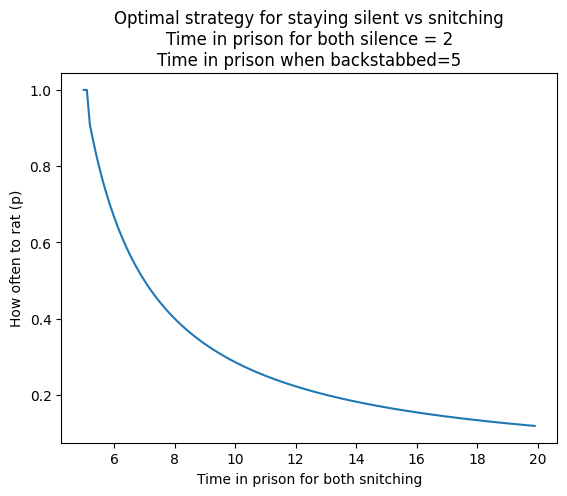

In [133]:
strats = []
T_snitches = np.arange(T_backstab, 20, 0.1)

for T in T_snitches:
    strats.append(run(50, [T_silence, T, T_backstab])[0])
    
plt.plot(T_snitches, strats)
plt.title('Optimal strategy for staying silent vs snitching\nTime in prison for both silence = {}\nTime in prison when backstabbed={}'.format(T_silence, T_backstab))
plt.xlabel('Time in prison for both snitching')
plt.ylabel('How often to rat (p)')
plt.show()